## Importing Libraries and dataset

In [35]:
# !pip install pyts

In [36]:
from pyts.image import GramianAngularField

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from pyts.image import MarkovTransitionField

import scipy
from scipy.io import loadmat

from pywt import wavedec


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import sklearn.svm as svm 
import sklearn.naive_bayes as naive_bayes


import tensorflow.compat.v1 as tf
from tensorflow import keras as K
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import TimeDistributed, Dense, Activation, Flatten, concatenate, Input, Dropout,Conv1D, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

import seaborn as sns

import xgboost as xgb

In [37]:
# Only change this cell.

subject = 3
t = 1

# t = 0 ==> GASF
# t = 1 ==> GADF

In [38]:
input_data = pd.read_csv("/kaggle/input/time-series-data/Final_inputs_"+str(subject)+".csv")
output_data = pd.read_csv("/kaggle/input/time-series-data/Final_outputs_"+str(subject)+".csv")

In [39]:
input_data

,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,...,img28,img29,img30,img31,img32,img33,img34,img35,img36,img37
0,-2.417099,-1.503188,-3.269673,-3.931844,0.114640,-1.327796,-1.730146,0.674268,0.149720,0.508491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.694177,4.832816,-1.256101,4.855599,0.150838,-1.924483,3.779251,-2.358868,-5.002558,1.117044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.742505,5.021310,2.189923,0.608903,-2.844505,3.129207,1.799764,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.226745,-0.800789,-1.711995,0.656553,-1.788577,-0.603581,2.937275,-1.830566,1.749488,-0.439940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.904182,0.853571,0.949903,-0.082244,0.122552,2.003360,0.010226,-0.332723,-0.505412,1.121559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,-15.240253,4.617602,-14.196294,17.418275,29.456024,-18.725599,-13.158666,-4.451028,-9.811268,24.219727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1691,-18.179188,12.943874,-12.521044,8.467686,3.673442,21.970932,-11.230978,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1692,0.593832,0.126553,0.163930,2.661867,-1.753413,-4.778223,-1.984924,1.211420,-1.309833,1.461608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1693,2.249809,2.462341,0.409153,3.123446,2.623774,1.322368,-0.578275,-0.309347,-0.535235,-3.755910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
output_data

,label
0,0
1,1
2,2
3,0
4,1
...,...
1690,1
1691,2
1692,0
1693,1


In [41]:
x = input_data.to_numpy()
y = output_data.to_numpy()

In [42]:
x

array([[-2.41709901, -1.50318786, -3.26967279, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.69417676,  4.83281601, -1.25610143, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.74250458,  5.02131012,  2.1899228 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.59383247,  0.12655329,  0.16393035, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.24980928,  2.46234088,  0.40915329, ...,  0.        ,
         0.        ,  0.        ],
       [-1.64133284, -2.27871505, -0.81706868, ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
y

array([[0],
       [1],
       [2],
       ...,
       [0],
       [1],
       [2]])

In [44]:
x = StandardScaler().fit_transform(x)

In [45]:
x

array([[-0.54954593, -0.30702146, -0.60837898, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44227954,  1.01163598, -0.22380469, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06356427,  1.05086562,  0.4343554 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.03471496,  0.03216241,  0.04740879, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35605156,  0.51828959,  0.0942442 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.39901117, -0.4684252 , -0.13995333, ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
len(y[0])

1

In [47]:
image_size = 37
gasf = GramianAngularField(image_size=image_size, method='summation')
X_Gasf = gasf.fit_transform(x)

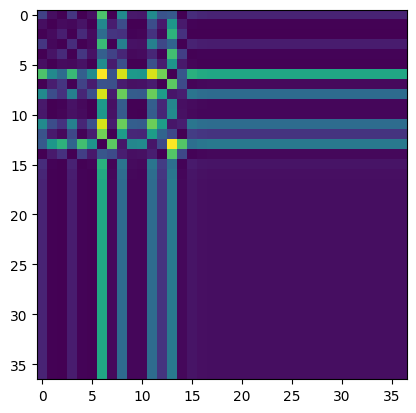

In [48]:
plt.imshow(X_Gasf[3])

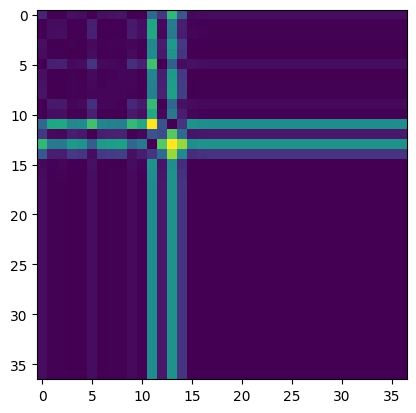

In [49]:
plt.imshow(X_Gasf[4])

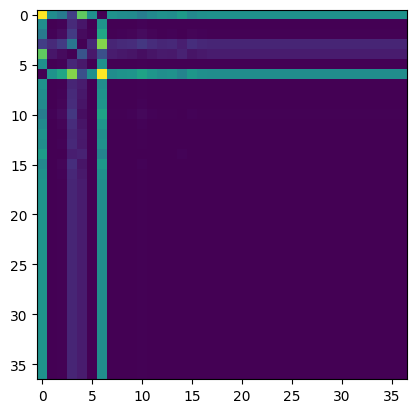

In [50]:
plt.imshow(X_Gasf[5])

In [51]:
gadf = GramianAngularField(image_size=image_size, method='difference')
X_Gadf = gadf.fit_transform(x)

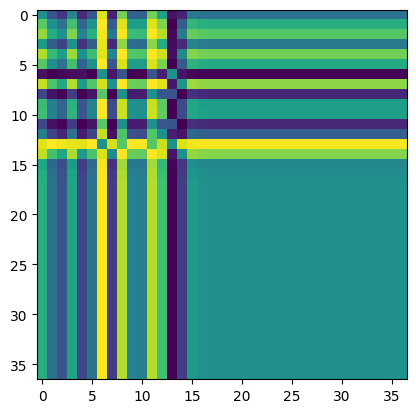

In [52]:
plt.imshow(X_Gadf[3])

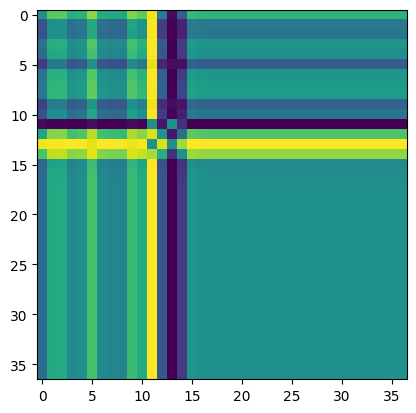

In [53]:
plt.imshow(X_Gadf[4])

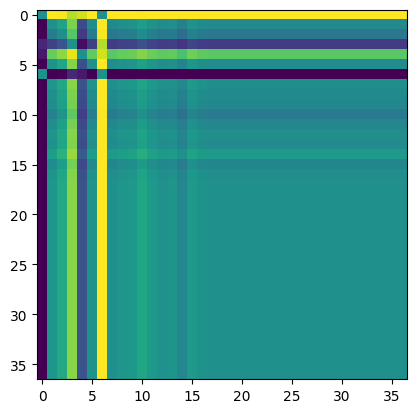

In [54]:
plt.imshow(X_Gadf[5])

In [55]:
# type(X_Gadf)

In [56]:
len(y)

1695

In [57]:
if(t == 0):
    matrices = X_Gasf
else:
    matrices = X_Gadf

In [58]:
matrices.shape

(1695, 37, 37)

In [59]:
matrices = matrices.reshape((matrices.shape[0],37,37,1))

In [60]:
matrices.shape

(1695, 37, 37, 1)

In [61]:
# x_train,x_test,y_train,y_test = train_test_split(matrices,y,test_size=0.20,random_state=42)

### Convolution Neural Network

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(37, (3, 3), activation='relu', input_shape=(37, 37,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 35, 35, 37)        370       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 37)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 15, 15, 64)        21376     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 5, 5, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1600)             

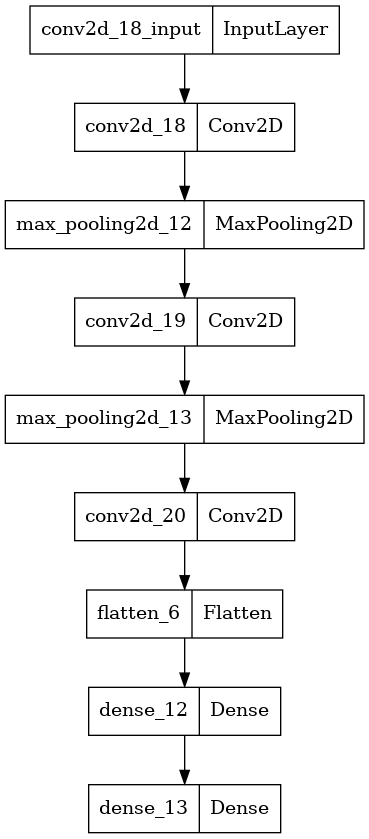

In [63]:
tf.keras.utils.plot_model(model)

In [64]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [65]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []


fold_no = 1

In [66]:
true_labels = []
pred_labels = []
pred_probs = []

In [67]:
# model = load_model('./_best_model.h5')
for train, test in kfold.split(x,y): 
    model = models.Sequential()
    model.add(layers.Conv2D(37, (3, 3), activation='relu', input_shape=(37, 37,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3))
    
    model,history = train_model(model, matrices[train], y[train], matrices[test], y[test], save_to= './', epoch = 50) 


    scores = model.evaluate(matrices[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    #   print("***************************************************\n")
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    y_pred = model.predict(matrices[test])
    pred_probs.extend(y_pred)
    fin_lst = []
    for i in y_pred:
        fin_lst.append(np.argmax(i, axis=0))

    fin_lst = np.array(fin_lst)
    fin_lst = fin_lst.reshape((-1,1))
#     y_hat = np.array(y_pred >= 0.5, dtype = int)
    true_labels.extend(y[test])
    pred_labels.extend(fin_lst)


    # Increase fold number
    fold_no = fold_no + 1

Epoch 1/50
75/77 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.6760
Epoch 1: val_accuracy improved from -inf to 0.66471, saving model to ./_best_model.h5
77/77 [==============================] - 2s 8ms/step - loss: 0.5331 - accuracy: 0.6774 - val_loss: 0.5162 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 2/50
65/77 [========================>.....] - ETA: 0s - loss: 0.4612 - accuracy: 0.7108
Epoch 2: val_accuracy improved from 0.66471 to 0.68824, saving model to ./_best_model.h5
77/77 [==============================] - 0s 5ms/step - loss: 0.4593 - accuracy: 0.7154 - val_loss: 0.4850 - val_accuracy: 0.6882 - lr: 9.0484e-04
Epoch 3/50
66/77 [========================>.....] - ETA: 0s - loss: 0.4471 - accuracy: 0.7447
Epoch 3: val_accuracy improved from 0.68824 to 0.71176, saving model to ./_best_model.h5
77/77 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.7449 - val_loss: 0.4671 - val_accuracy: 0.7118 - lr: 8.1873e-04
Epoch 4/50
65/77 [==

In [68]:
# print(acc_per_fold)
# print(loss_per_fold)
print(true_labels[:10])
print(pred_labels[:10])
# print(pred_probs)

[array([2]), array([2]), array([0]), array([2]), array([2]), array([1]), array([2]), array([2]), array([0]), array([1])]
[array([2]), array([2]), array([0]), array([2]), array([2]), array([1]), array([2]), array([2]), array([1]), array([0])]


In [69]:
print(acc_per_fold)

[76.47058963775635, 78.82353067398071, 78.82353067398071, 78.23529243469238, 80.58823347091675, 78.10651063919067, 72.18934893608093, 75.14792680740356, 77.51479148864746, 76.92307829856873]


In [70]:
acc = np.mean(acc_per_fold)
acc ="{0:0.2f}".format(acc*0.01)
acc

'0.77'

In [71]:
print(classification_report(true_labels, pred_labels,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       565
           1       0.67      0.64      0.65       565
           2       0.99      1.00      1.00       565

    accuracy                           0.77      1695
   macro avg       0.77      0.77      0.77      1695
weighted avg       0.77      0.77      0.77      1695



In [72]:
precision = classification_report(true_labels, pred_labels,labels=[0,1,2])[291:295]
precision

'0.77'

In [73]:
recall = classification_report(true_labels, pred_labels,labels=[0,1,2])[301:305]
recall

'0.77'

In [74]:
f1 = classification_report(true_labels, pred_labels,labels=[0,1,2])[311:315]
f1

'0.77'

In [75]:
ly_test = label_binarize(true_labels, classes=[0, 1, 2])
test_yhat = label_binarize(pred_labels, classes=[0, 1, 2])

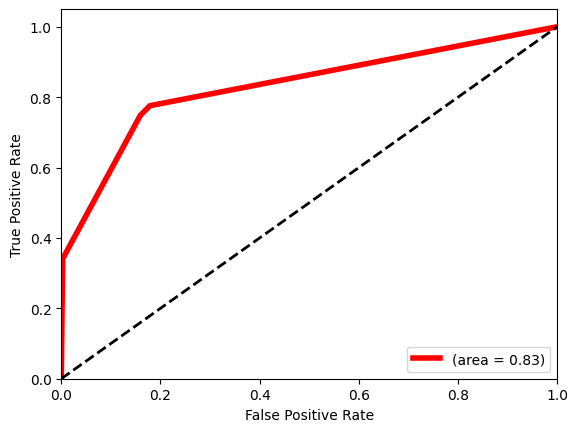

In [76]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ly_test[:, i], test_yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ly_test.ravel(), test_yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="(area = {0:0.2f})".format(roc_auc["macro"]),
    color="red",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.savefig('./roc_'+str(subject)+'_'+str(t)+'.png')
plt.show()

In [95]:
roc="{0:0.2f}".format(roc_auc["macro"])
roc

'0.83'